In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('AppleStock.csv')
print(df['low'])
print(df['high'])

0       163.05
1       164.60
2       166.14
3       166.04
4       166.63
         ...  
1947    176.27
1948    176.34
1949    175.95
1950    175.33
1951    174.64
Name: low, Length: 1952, dtype: float64
0       164.8099
1       165.5200
2       167.7300
3       167.4200
4       167.7171
          ...   
1947    176.8400
1948    176.8000
1949    176.4700
1950    176.3200
1951    175.6700
Name: high, Length: 1952, dtype: float64


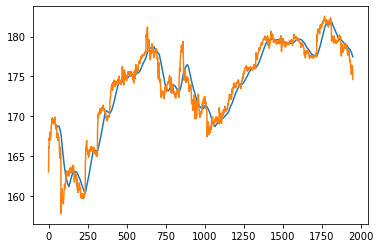

In [183]:
x=[]
n=50
for i in range(len(df)-n):
    x+=[sum(df['low'][i:i+n])/n]
plt.plot([*range(n,len(df['low']))],x)
plt.plot(df['low'][:])



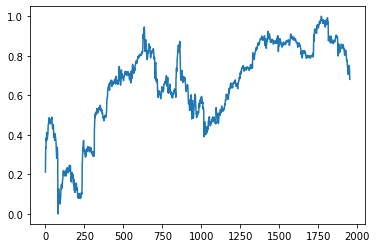

In [56]:
def normalize(v):
    p=[]
    m=max(v)
    n=min(v)
    d=m-n
    for i in range(len(v)):
        p.append((v[i]-n)/d)
    return p

vl=normalize(df['low'])
vh=normalize(df['high'])
plt.plot(vl)

In [132]:
# Gives local min for intervals of n time slots ahead
# O(n)


def findMin(x,v,n):
    i=0
    m=v[i]
    c=0
    index=[]
    value=[]
    for j in range(len(v)-1):
        if v[j+1]>=m:
            c+=1
            if c==n:
                value.append(m)
                index.append(x[i])
                m=v[j+1]
                i=j+1
                c=0
        else:
            c=0
            m=v[j+1]
            i=j+1
            
    for j in range(n-1):
        low=True
        if v[len(v)-1]>v[len(v)-j-2]:
            low=False
    if low==True:
        value.append(v[len(v)-1])
        index.append(x[len(v)-1])
    return index,value

In [58]:
# Gives local max for intervals of n
def findMax(x,v,n):
    i=0
    m=v[i]
    c=0
    index=[]
    value=[]
    for j in range(len(v)-1):
        if v[j+1]<=m:
            c+=1
            if c==n or j+1==len(v)-1:
                value.append(m)
                index.append(x[i])
                m=v[j+1]
                i=j+1
                c=0
        else:
            c=0
            m=v[j+1]
            i=j+1
            
    for j in range(n-1):
        high=True
        if v[len(v)-1]<v[len(v)-j-2]:
            high=False
    if high==True:
        value.append(v[len(v)-1])
        index.append(x[len(v)-1])
    return index,value

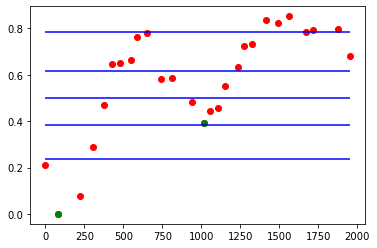

In [59]:
x,y=findMin(range(len(vl)),vl,40)
x2,y2=findMin(x,y,10)

plt.scatter(x,y,c='r')
plt.scatter(x2,y2,c='g')



plt.plot()
plt.hlines(.236, 0, len(vh), 'b', '-')
plt.hlines(.382, 0, len(vh), 'b', '-')
plt.hlines(.50, 0, len(vh), 'b', '-')
plt.hlines(.618, 0, len(vh), 'b', '-')
plt.hlines(.786, 0, len(vh), 'b', '-')


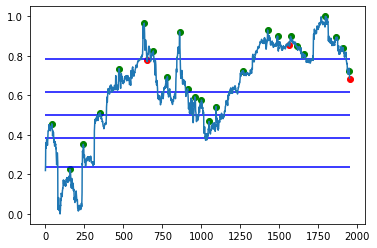

In [67]:
plt.plot(vh)
xh,yh=findMax(range(len(vh)),vh,40)
x,y=findMax(x,y,10)

plt.scatter(x,y,c='r')
plt.scatter(xh,yh,c='g')
plt.hlines(.236, 0, len(vh), 'b', '-')
plt.hlines(.382, 0, len(vh), 'b', '-')
plt.hlines(.50, 0, len(vh), 'b', '-')
plt.hlines(.618, 0, len(vh), 'b', '-')
plt.hlines(.786, 0, len(vh), 'b', '-')


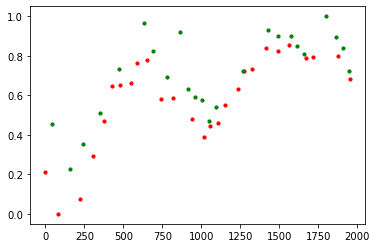

In [71]:
xl,yl=findMin(range(len(vl)),vl,40)
xh,yh=findMax(range(len(vh)),vh,40)

In [123]:
#O(n+m)

def zipp(lv,hv,liv,hiv,p):
    c=0
    v=[]
    vi=[]
    li=0
    hi=0
    m=0
    while li<len(lv) and hi<len(hv):
        m=li
        while liv[li]<hiv[hi]:
            if lv[m]-lv[li]>-p:
                m=li
            li+=1
        v.append(lv[m])
        vi.append(liv[m])

        m=hi
        while hiv[hi]<liv[li]:
            if hv[m]-hv[hi]<p:
                m=hi
            hi+=1
            if hi>=len(hv):
                break
        if hi>=len(hv):
                break
        v.append(hv[m])
        vi.append(hiv[m])
    return vi,v

In [120]:
#O(n)

def unzipp(x,y):
    lv=[]
    hv=[]
    liv=[]
    hiv=[]
    for i in range(len(x)):
        if i%2==0:
            liv.append(x[i])
            lv.append(y[i])
        else:
            hiv.append(x[i])
            hv.append(y[i])  
    return lv,hv,liv,hiv

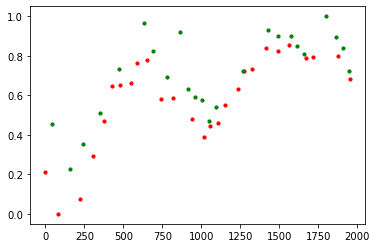

In [210]:
plt.scatter(xl,yl,s=10,c='r')
plt.scatter(xh,yh,s=10,c='g')
X,Y=zipp(yl,yh,xl,xh,0.03)
ylow,yhigh,xlow,xhigh=unzipp(X,Y)

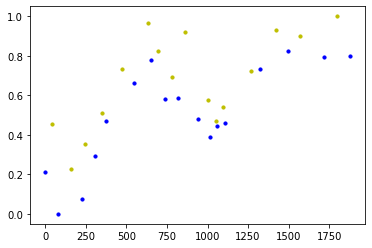

In [131]:
plt.scatter(xlow,ylow,s=10,c='b')
plt.scatter(xhigh,yhigh,s=10,c='y')

In [169]:
def findInc(vec,x,y,change,daysbefore):
    v=[]
    vi=[]
    startendx=[]
    startendy=[]

    veci=[*range(len(vec))]
    for i in range(1,len(x)-1):
        if y[i+1]-y[i]>=change:
            n=x[i]+1
            m=n-daysbefore
            if n-daysbefore<0:
                m=0
            v.append(vec[m:n])
            vi.append(veci[m:n])
            startendx.append([x[i],x[i+1]])
            startendy.append([y[i],y[i+1]])
    return v,vi,startendx,startendy

def findDec(vec,x,y,change,daysbefore):
    v=[]
    vi=[]
    startendx=[]
    startendy=[]
    
    veci=[*range(len(vec))]
    for i in range(1,len(x)-1):
        if y[i+1]-y[i]<=change:
            n=x[i]+1
            m=n-daysbefore
            if n-daysbefore<0:
                m=0
            v.append(vec[m:n])
            vi.append(veci[m:n])
            startendx.append([x[i],x[i+1]])
            startendy.append([y[i],y[i+1]])
    return v,vi,startendx,startendy



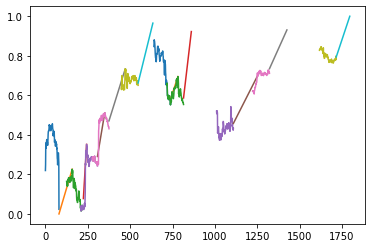

In [170]:
incy,incx,incsex,incsey=findInc(vh,X,Y,0.1,100)
for i in range(len(incy)):
    plt.plot(incx[i],incy[i])
    plt.plot(incsex[i],incsey[i])


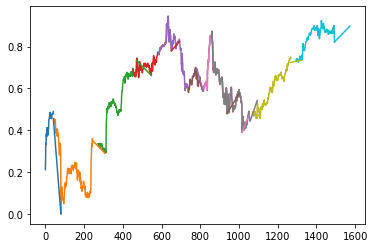

In [171]:
decy,decx,decsex,decsey=findDec(vl,X,Y,0.1,200)
for i in range(int(len(decy)/2)):
    plt.plot(decx[2*i],decy[2*i])
for i in range(int(len(decy)/2)):
    plt.plot(decsex[2*i],decsey[2*i])

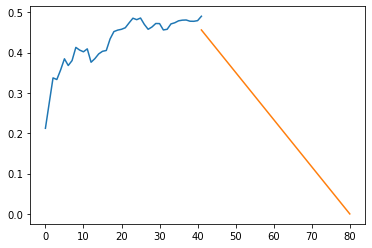

In [172]:

plt.plot(decx[n],decy[n])
plt.plot(decsex[n],decsey[n])

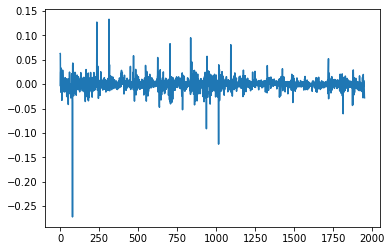

In [193]:
def Differences(v):
    d=[]
    for i in range(len(v)-1):
        d.append(v[i+1]-v[i])
    return d

diff=Differences(vl)
plt.plot(diff)

In [200]:
dfApple=pd.DataFrame()
dfApple

""


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

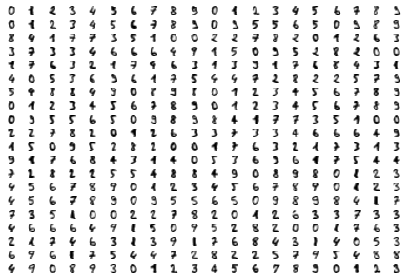

In [203]:
import umap
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

digits = load_digits()
print(digits.DESCR)

fig, ax_array = plt.subplots(20, 20)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)


In [202]:
#digits_df = pd.DataFrame(digits.data[:,1:11])
#digits_df['digit'] = pd.Series(digits.target).map(lambda x: 'Digit {}'.format(x))
#sns.pairplot(digits_df, hue='digit', palette='Spectral')

In [207]:
digits_df = pd.DataFrame(digits.data)
reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)
print(digits_df)

np.shape(digits.data)

umap.UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

       0    1     2     3     4     5    6    7    8    9   ...   54   55  \
0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  4.0  0.0   
1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  ...  1.0  0.0   
1794  0.0  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  2.0  0.0   
1796  0.0  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  ...  8.0  0.0   

       56   57   58    59    60    61   62   63  
0     0.0  0.0  6.0  13.0

UMAP(low_memory=False, random_state=42)

In [208]:
embedding = reducer.transform(digits.data)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(1797, 2)

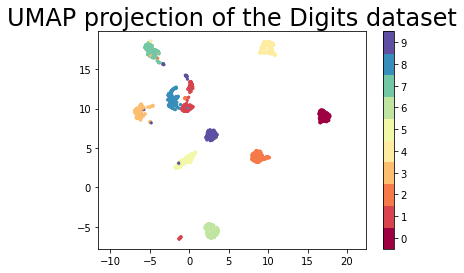

In [209]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);